* This is the EDA Notebook, but the main purpose is showing why the columns for the final model in train.py were specifically chosen.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
import pickle
from sklearn.decomposition import PCA

import os

In [3]:
#path_folder = os.getcwd()
path_folder = ""

In [4]:
path_folder_traffic_landuse_street_segment_data= path_folder + "../data/temp/traffic_landuse_street_segment_data.csv"

In [5]:
traffic_landuse_street_segment_data_orig = pd.read_csv(path_folder_traffic_landuse_street_segment_data)

In [6]:
traffic_landuse_street_segment_data_orig["Number_Tra"] = traffic_landuse_street_segment_data_orig["Number_Tra"].fillna((traffic_landuse_street_segment_data_orig["Number_Tra"]).median())

traffic_landuse_street_segment_data_orig["Traffic"] = zscore(traffic_landuse_street_segment_data_orig["Traffic"].apply(np.log1p))
traffic_landuse_street_segment_data_orig["StreetWidt"] = zscore(traffic_landuse_street_segment_data_orig["StreetWidt"].apply(np.log1p))
traffic_landuse_street_segment_data_orig["Number_Tra"] = zscore(traffic_landuse_street_segment_data_orig["Number_Tra"].apply(np.log1p))

In [7]:
ohe_hours_columns = pd.get_dummies(traffic_landuse_street_segment_data_orig["Hour"].astype(str), prefix="Hour")
target_column = traffic_landuse_street_segment_data_orig[["Traffic"]]
ohe_hours_column_names = list(ohe_hours_columns.columns)
landuse_column_names = ['LandUse_01', 'LandUse_02', 'LandUse_03', 'LandUse_04', 'LandUse_05', 'LandUse_06', 
                        'LandUse_07', 'LandUse_08', 'LandUse_09', 'LandUse_10', 'LandUse_11', 'LandUse_NULL']
landuse_columns = traffic_landuse_street_segment_data_orig[landuse_column_names]
numerical_columns = traffic_landuse_street_segment_data_orig[['is_weekend', 'Number_Tra', 'StreetWidt']]
traffic_landuse_street_segment_data = pd.concat([ohe_hours_columns,landuse_columns,numerical_columns, target_column], axis=1)

* There is a visible gradient in the points when PCA is applied to the specific set of columns chosen - the hours, landuse, and is_weekend, street width (StreetWidt), and number of travel lanes (Number_Tra) columns

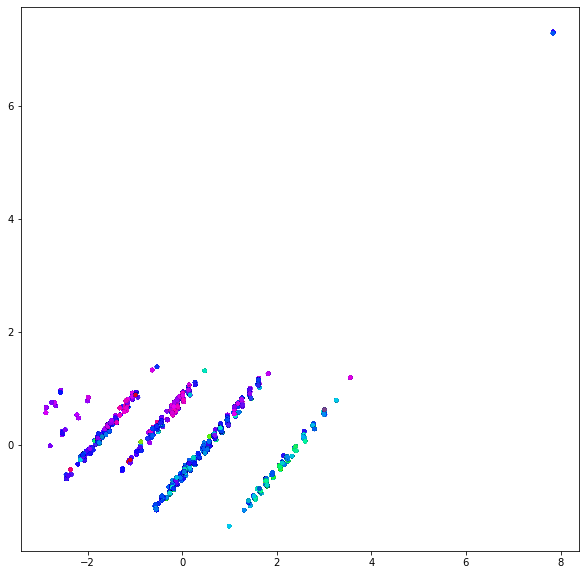

In [8]:
column_names = []
column_names += ohe_hours_column_names
column_names += landuse_column_names
column_names += ["is_weekend"]
column_names += ["Number_Tra"]
column_names += ["StreetWidt"]

pca = PCA(2).fit_transform(traffic_landuse_street_segment_data[column_names])
fig, axs = plt.subplots(figsize=(10,10))
axs.scatter(pca[:,0], pca[:,1], c=traffic_landuse_street_segment_data_orig['Traffic'],alpha=0.1, s=10,cmap='hsv')

* Even then, is_weekend and StreetWidt are not really needed. If they are omitted, then the Regression model accuracy will drop by 10% points (90 to 80), though the classification models accuracies will stay the same

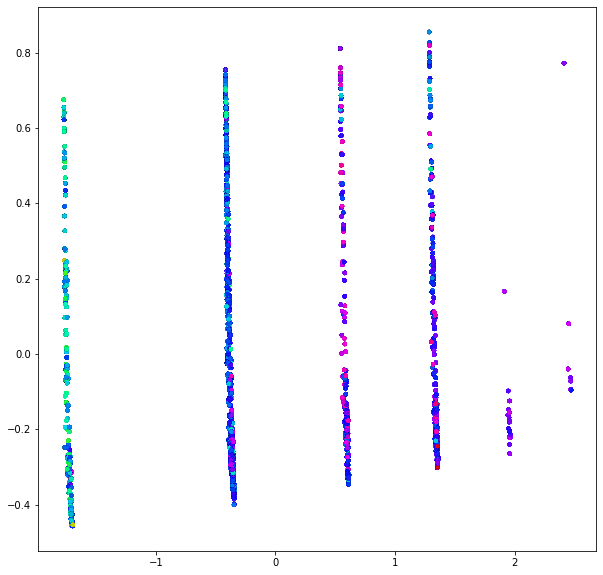

In [9]:
column_names = []
column_names += ohe_hours_column_names
column_names += landuse_column_names
#column_names += ["is_weekend"]
column_names += ["Number_Tra"]
#column_names += ["StreetWidt"]

pca = PCA(2).fit_transform(traffic_landuse_street_segment_data[column_names])
fig, axs = plt.subplots(figsize=(10,10))
axs.scatter(pca[:,0], pca[:,1], c=traffic_landuse_street_segment_data_orig['Traffic'],alpha=0.1, s=10,cmap='hsv')